In [1]:
import $file.scripts.importer

importer.loadProjectDependencies

import $file.$               



In [2]:
import scala.collection.JavaConverters._
import scala.collection.JavaConversions._
import edu.stanford.math.plex4._
import edu.stanford.math.plex4.api._
import edu.stanford.math.plex4.visualization._
import edu.stanford.math.plex4.homology.barcodes._
import edu.stanford.math.plex4.streams.impl.LazyWitnessStream

import breeze.numerics._
import breeze.linalg._
import breeze.math._
import breeze.stats.mean
import breeze.util.JavaArrayOps

import tda.persistence.Analysis._
import tda.persistence.Math

def drawBarcodes(images: Seq[java.awt.image.BufferedImage]) = {
  images foreach publish.png 
}


import scala.collection.JavaConverters._

import scala.collection.JavaConversions._

import edu.stanford.math.plex4._

import edu.stanford.math.plex4.api._

import edu.stanford.math.plex4.visualization._

import edu.stanford.math.plex4.homology.barcodes._

import edu.stanford.math.plex4.streams.impl.LazyWitnessStream


import breeze.numerics._

import breeze.linalg._

import breeze.math._

import breeze.stats.mean

import breeze.util.JavaArrayOps


import tda.persistence.Analysis._

import tda.persistence.Math


defined function drawBarcodes

In [3]:
lazy val digitsRawData = csvread(importer.loadData("digits.csv"))
lazy val digitsData = digitsRawData(*, Range(0, digitsRawData.cols - 1)).underlying 

lazy val digitsDataArray = JavaArrayOps.dmDToArray2(digitsData)

digitsRawData: DenseMatrix[Double] = <lazy>
digitsData: DenseMatrix[Double] = <lazy>
digitsDataArray: Array[Array[Double]] = <lazy>

## Full dataset homology 

In [4]:
lazy val (maxDimension, maxFiltrationValue, numDivisions) = (5, 15, 50)

lazy val digitsStream = Plex4.createVietorisRipsStream(digitsDataArray, maxDimension, maxFiltrationValue, numDivisions)

lazy val digitsImages = barcodeImages(
  digitsStream,
  maxDimension,
  maxFiltrationValue,
  defaultPersistenceAlgorithm(maxDimension))

maxDimension: Int = <lazy>
maxFiltrationValue: Int = <lazy>
numDivisions: Int = <lazy>
digitsStream: streams.impl.VietorisRipsStream[Array[Double]] = <lazy>
digitsImages: List[java.awt.image.BufferedImage] = <lazy>

In [5]:
println(Seq(
  "Digits simplex stream for",
  s"maxFiltrationValue = ${maxFiltrationValue}",
  s"has ${digitsStream.getSize()} simplices").mkString("\n"))

Digits simplex stream for
maxFiltrationValue = 15
has 94824 simplices


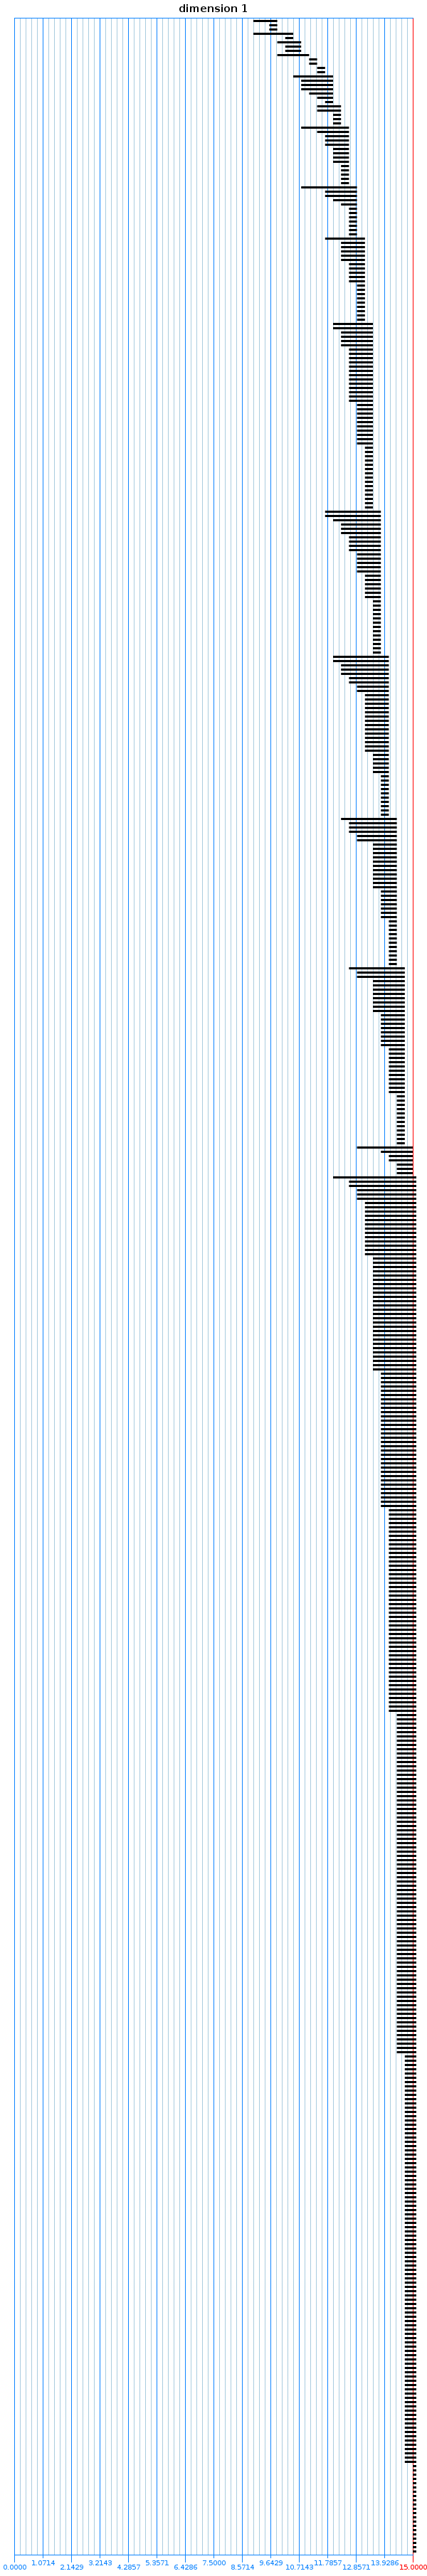

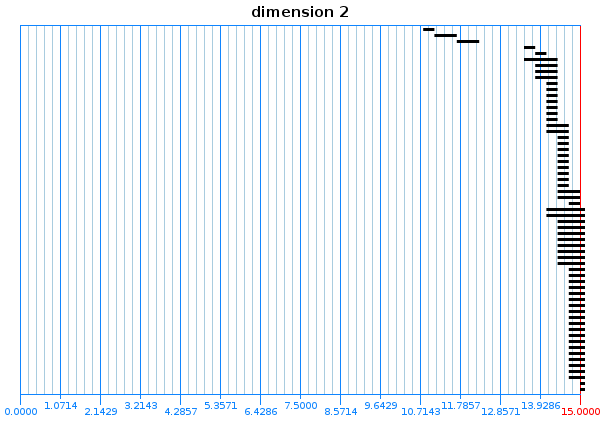

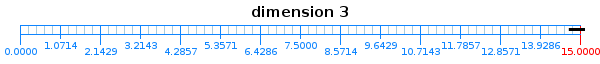

In [6]:
drawBarcodes(digitsImages.tail)

## Reduced dataset's homology 

In [ ]:
val noLandmarkPoints = 500 

lazy val digitsLandmarksSelector = Plex4
  .createMaxMinSelector(digitsDataArray, noLandmarkPoints)

val epsilon = digitsLandmarksSelector.getMaxDistanceFromPointsToLandmarks

lazy val digitsLandmarks = digitsLandmarksSelector
  .getLandmarkPoints()
  .map(digitsDataArray(_))


In [ ]:
lazy val (maxDimension, landmarksMaxFiltrationValue, numDivisions) = 
         (10          , epsilon * 1.11                , 50)

lazy val digitsLandmarksStream = Plex4.createVietorisRipsStream(digitsLandmarks, maxDimension, landmarksMaxFiltrationValue, numDivisions)

lazy val digitsLandmarksImages = Viz.barcodeImages(
  digitsLandmarksStream,
  maxDimension,
  landmarksMaxFiltrationValue,
  defaultPersistenceAlgorithm(maxDimension))

In [ ]:
println(Seq(
  "Reduced simplex stream for",
  s"maxFiltrationValue = ${landmarksMaxFiltrationValue}",
  s"on ${'\u03B5'}-net for ${'\u03B5'} = ${digitsLandmarksSelector.getMaxDistanceFromPointsToLandmarks}",
  s"and has ${digitsLandmarksStream.getSize()} simplices").mkString("\n"))

In [ ]:
drawBarcodes(digitsLandmarksImages.tail)

In [ ]:
val dists = Math.dist(digitsData, digitsData)

In [ ]:
dists.toDenseVector.toArray.filter(_ > 15).min
mean(dists)
max(dists)

## Lazy witness complex homology 

In [ ]:
val noLandmarkPoints = 50

lazy val samples = subsampleRandom(250, digitsDataArray)

lazy val witnessSelector = Plex4
  .createMaxMinSelector(samples, noLandmarkPoints)

val witnessFiltrationValue = 0.5  * witnessSelector.getMaxDistanceFromPointsToLandmarks

In [ ]:
witnessSelector.getUnderlyingMetricSpace.size


In [ ]:
lazy val digitsWitnessStream = new LazyWitnessStream(
  witnessSelector.getUnderlyingMetricSpace,
  witnessSelector,
  maxDimension,
  witnessFiltrationValue,
  1,
  numDivisions)

digitsWitnessStream.finalizeStream()

lazy val digitsWitnessImages = barcodeImages(
  digitsWitnessStream,
  maxDimension,
  landmarksMaxFiltrationValue,
  defaultPersistenceAlgorithm(maxDimension))

In [ ]:
println(Seq(
  "Digits simplex stream for",
  s"maxFiltrationValue = ${landmarksMaxFiltrationValue}",
  s"is ${'\u03B5'}-net for ${'\u03B5'} = ${witnessSelector.getMaxDistanceFromPointsToLandmarks}",
  s"and has ${digitsWitnessStream.getSize()} simplices").mkString("\n"))

In [ ]:
drawBarcodes(digitsWitnessImages)